In [2]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [4]:
ls

data/                    Ejemplo-Pandas-05.ipynb  Ejemplo-Pandas-08.ipynb
Ejemplo-Pandas-03.ipynb  Ejemplo-Pandas-06.ipynb  Ejemplo-Pandas-09.ipynb*
Ejemplo-Pandas-04.ipynb  Ejemplo-Pandas-07.ipynb  notebook-py3/


In [5]:
archivo = open('data/log-course.txt', 'r')

lineas = archivo.readlines()


In [6]:
cadena = lineas[0]

In [7]:
print cadena

{"username": "", "event_type": "/courses/course-v1:UTPL+SARH5+2019_1/about", "ip": "77.111.247.82", "agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36 OPR/58.0.3135.127", "host": "opencampus.utpl.edu.ec", "referer": "", "accept_language": "es-ES,es;q=0.9", "event": "{\"POST\": {}, \"GET\": {}}", "event_source": "server", "context": {"course_user_tags": {}, "user_id": "", "org_id": "UTPL", "course_id": "course-v1:UTPL+SARH5+2019_1", "path": "/courses/course-v1:UTPL+SARH5+2019_1/about"}, "time": "2019-04-01T04:28:26.189835+00:00", "page": null}



In [8]:
lista = []
import json
for l in lineas:
    try:
        cadena1 = json.loads(l)
        diccionario_context = cadena1['context']
        for d in diccionario_context.keys():
            cadena1["context_%s" % d] = diccionario_context[d]
            # print cadena1['event']
        lista.append(cadena1)
    except:
        print l

In [9]:
data = pd.DataFrame(lista)

In [10]:
data.shape

(51262, 20)

In [11]:
data.keys()

Index([u'accept_language', u'agent', u'context', u'context_course_id',
       u'context_course_user_tags', u'context_module', u'context_org_id',
       u'context_path', u'context_user_id', u'event', u'event_source',
       u'event_type', u'host', u'ip', u'name', u'page', u'referer', u'session',
       u'time', u'username'],
      dtype='object')

In [12]:
data['time2']= pd.to_datetime(data['time']) 

# data.time2


In [13]:
data["time3"] = data["time2"].apply(lambda x: "%s-%s-%s" % (x.year, x.month, x.day))
data['time3']= pd.to_datetime(data['time3']) 


In [14]:
# data["time3"]

In [15]:
data.groupby("time3").size()

time3
2019-04-01     319
2019-04-02     334
2019-04-03     381
2019-04-04     276
2019-04-05     221
2019-04-06     141
2019-04-07     113
2019-04-08     241
2019-04-09     264
2019-04-10     176
2019-04-11     293
2019-04-12     285
2019-04-13     231
2019-04-14     388
2019-04-15    1236
2019-04-16     467
2019-04-17     193
2019-04-18     123
2019-04-19      65
2019-04-20      58
2019-04-21     124
2019-04-22     154
2019-04-23     262
2019-04-24     160
2019-04-25      93
2019-04-26     408
2019-04-27     124
2019-04-28      62
2019-04-29     149
2019-04-30     107
2019-05-01      69
2019-05-02     127
2019-05-03      70
2019-05-04      39
2019-05-05      80
2019-05-06    5797
2019-05-07    6991
2019-05-08    4721
2019-05-09    4049
2019-05-10    3083
2019-05-11    3168
2019-05-12    6444
2019-05-13    5505
2019-05-14    3671
dtype: int64

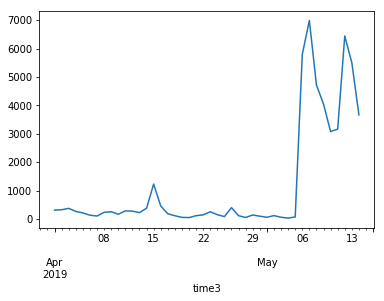

In [16]:
## ejemplo data1= data

data1 = data
# data1.set_index('Date', inplace=True)
# data['adj_close'].plot()

data1.groupby('time3').size().plot()
